<a href="https://colab.research.google.com/github/mukul-mschauhan/linear-regression/blob/main/Day01-Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Predict the Premium of a Car Insurance basis Mileage

In [2]:

premium = pd.DataFrame({"Mileage":[15, 14,17, 7, 10, 7, 20, 21,
                                   18, 11, 7.9, 8.6, 12.3, 17.1, 19.4],
                        "Premium":[392.5, 46.2, 15.7, 422.2, 119.4, 170.9,
                                   56.9, 77.5, 214, 65.3, 250, 220, 217.5, 140.88, 97.25]})

### Calculation of Slope and Intercept

In [4]:
xbar = premium.Mileage.mean()
ybar = premium.Premium.mean()

In [7]:
# Numerator
num = np.sum((premium.Mileage - xbar)*(premium.Premium - ybar))

# Denominator
deno = np.sum((premium.Mileage - xbar)**2)

beta1 = num/deno # Slope of the Model
print(f"Slope of the Model: {beta1}")

Slope of the Model: -11.690503214338849


In [8]:
# Intercept
intercept = ybar - beta1*xbar
print(f"Intercept of the Model: {intercept}")

Intercept of the Model: 327.08602066025105


In [9]:
import scipy.stats as stats

stats.linregress(premium.Mileage, premium.Premium)


LinregressResult(slope=-11.690503214338849, intercept=327.08602066025105, rvalue=-0.4750732855334364, pvalue=0.07352019667187858, stderr=6.005609036323512, intercept_stderr=87.03548304465379)

In [12]:
# Prediction using Equation 327.086 -11.69 * Mileage

premium['yhat'] = intercept + beta1*premium.Mileage

In [13]:
# Error is also known as Residual | yi-yhat

premium["error"] = premium.Premium - premium.yhat

In [15]:
#np.sum(premium.error) = 0 | yi-yhat**2
# RMSE
n = premium.shape[0]

SSE = np.sum(premium.error**2)
MSE = SSE/n
RMSE = np.sqrt(MSE)

print(f"RMSE: {RMSE}")

RMSE: 103.17588938167539


In [16]:
# Direct Function
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(premium.Premium, premium.yhat))

103.17588938167539

### Visualizing Regression Model

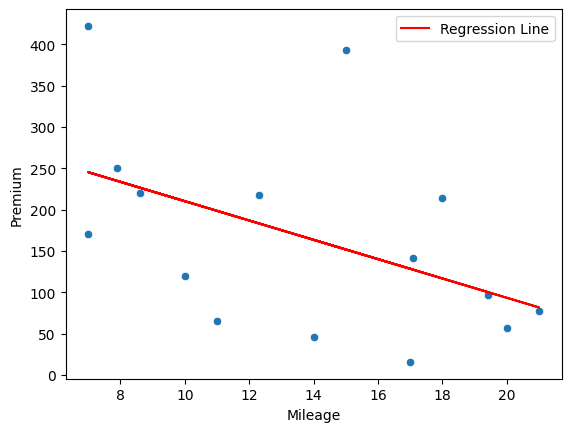

In [18]:
sns.scatterplot(x = "Mileage", y = "Premium", data = premium)
plt.plot(premium.Mileage, premium.yhat,
         color = "red", label = "Regression Line")
plt.legend()
plt.show()

### Model Diagnostic

* RSquared
* Adjusted R2
* FTest of the Model & PValue
* Slope and Intercept
* Standard Error
* TTest & PValue
* Confidence Interval

In [19]:
# Model
import statsmodels.formula.api as sfa

model = sfa.ols("Premium~Mileage",
                data = premium).fit() # fit: Slope & Intercept
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     3.789
Date:                Mon, 16 Dec 2024   Prob (F-statistic):             0.0735
Time:                        08:08:51   Log-Likelihood:                -90.831
No. Observations:                  15   AIC:                             185.7
Df Residuals:                      13   BIC:                             187.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    327.0860     87.035      3.758      0.0

## Calculation of R Squared

r-sq = 1 - (SSE/SST)

In [21]:
SST = np.sum((premium.Premium - ybar)**2)

# SSE = np.sum(premium.Premium - yhat**2)
rsquared = 1 - (SSE/SST)

print(f"RSquared: {rsquared}")

RSquared: 0.22569462662753426
